<a href="https://colab.research.google.com/github/Mike030668/MIPT_magistratura/blob/main/ModNet%20/DQA/%D0%94%D0%97_3__%D0%A7%D0%B0%D1%81%D1%82%D1%8C_2__%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Модуль 3. Мультимодальные и мультизадачные модели. Часть 1

Это вторая часть домашней работы №3 "Реализация Visual Question Answering / Document Question Answering"

## Часть 2. Использование модели

### [2 балла] Сделать демо на gradio

Модель готова! Теперь было бы круто, если модель можно было захостить и оттестировать на практике.

В этом задании вам нужно будет реализовать демо на gradio, которое будет принимать изображение и вопрос, а далее выдавать ответ.

Пример демо, аналогично которому вам нужно реализовать модель --- https://huggingface.co/spaces/nielsr/comparing-VQA-models.


**Подсказка:**

В вкладке `Files` на демо вы можете посмотреть реализацию, там нужно заменить инференс, используемой модели, на инференс нашей модели с переводом


**Ожидаемый результат**

В качестве результата в этой секции вам нужно код для запуска демо на градио и видеозапись его работы, где реализован описанный выше функционал. Видео прикрепляйте отдельным файлом.

In [ ]:
!pip install transformers[torch] sentencepiece datasets --q
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

!sudo apt install tesseract-ocr -q
!pip install pytesseract -q

!pip install -q gradio
!pip install typing-extensions --upgrade -q

exit()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.2 MB/s eta 0:00:00
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-rhouyiag
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/det

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (26.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dia

In [ ]:
import numpy as np
import torch

import warnings
warnings.filterwarnings("ignore")

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE



'cuda'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### Loading LayoutLMv2ImageProcessor

https://huggingface.co/docs/transformers/main/en/model_doc/layoutlmv2

In [ ]:
from transformers import LayoutLMv2ImageProcessor, LayoutLMv2TokenizerFast, LayoutLMv2Processor

model_checkpoint = "microsoft/layoutlmv2-base-uncased"
img_processor = LayoutLMv2ImageProcessor()  # apply_ocr is set to True by default
layout_tokenizer = LayoutLMv2TokenizerFast.from_pretrained(model_checkpoint)
processor = LayoutLMv2Processor(img_processor, layout_tokenizer)

In [ ]:
from transformers import LayoutLMv2Processor, LayoutLMv2TokenizerFast

model_checkpoint = "microsoft/layoutlmv2-base-uncased"
processor = LayoutLMv2Processor.from_pretrained(model_checkpoint)
layout_tokenizer = processor.tokenizer


##### Load tuned model

In [ ]:
save_to_path = '/content/drive/Othercomputers/My_comp/Документы/МФТИ_Наука_о_данных/Современные_модели_DL/Document_Question_Answering_DZ'

In [ ]:
from transformers import AutoConfig, AutoModelForDocumentQuestionAnswering

local_checkpoint = '4400'
model_path = save_to_path + "/MariaK/layoutlmv2-base-uncased_finetuned_docvqa"
local_model_checkpoint = model_path + f'/checkpoint-{local_checkpoint}/'

config = AutoConfig.from_pretrained(local_model_checkpoint + 'config.json')
AMQA_model = AutoModelForDocumentQuestionAnswering.from_pretrained(local_model_checkpoint + 'pytorch_model.bin',
                                                              #from_tf=True,
                                                              config=config).to(DEVICE)

#### Translate and inference functiones

In [ ]:
import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer
translator_name = "cointegrated/rut5-base-multitask"
tokenizer_translator = T5Tokenizer.from_pretrained(translator_name)
translator = T5ForConditionalGeneration.from_pretrained(translator_name)

def translate_en2ru(text):
    text = 'translate en-ru | ' + text
    inputs = tokenizer_translator(text, return_tensors='pt')
    with torch.no_grad():
        hypotheses = translator.generate(**inputs, num_beams=5)
    return tokenizer_translator.decode(hypotheses[0], skip_special_tokens=True)


def translate_ru2en(text):
    text = 'translate ru-en | ' + text
    inputs = tokenizer_translator(text, return_tensors='pt')
    with torch.no_grad():
        hypotheses = translator.generate(**inputs, num_beams=5)
    return tokenizer_translator.decode(hypotheses[0], skip_special_tokens=True)


def ru_inference(ru_text, image):

  # translate question
  en_text = translate_ru2en(ru_text)
  # prepare for the model
  encoded_inputs = processor(image, en_text, return_tensors="pt")
  # step 2: forward pass
  for k,v in encoded_inputs.items():
    encoded_inputs[k] = v.to(AMQA_model.device)
  # predict
  outputs = AMQA_model(**encoded_inputs)
  # step 4: get largest logit for both
  predicted_start_idx = outputs.start_logits.argmax(-1).item()
  predicted_end_idx = outputs.end_logits.argmax(-1).item()
  # step 5: decode the predicted answer
  en_answer = layout_tokenizer.decode(encoded_inputs.input_ids.squeeze()[predicted_start_idx:predicted_end_idx+1])

  return translate_en2ru(en_answer)



You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


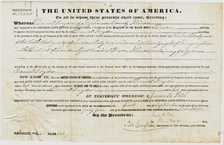

In [ ]:
import requests
import PIL

url = "https://images.squarespace-cdn.com/content/v1/5725102d40261dcef4de7e01/1504066114053-NYCUGVPHMXJD3SL5AN02/Public+document+translation+from+English+to+Spanish+and+Spanish+to+English?format=2500w"

image = PIL.Image.open(requests.get(url, stream=True).raw).convert("RGB")
width, height  = image.size
new_width  = 224
new_height = int(new_width * height / width)
image = image.resize((new_width, new_height), PIL.Image.LANCZOS)
image

#### Test ru_inference

In [ ]:
ru_question = 'страна в документе'

#get answer
ru_answer = ru_inference(ru_question, image)

print(f'pred_ru_answer: {ru_answer}' ,'\n')


pred_ru_answer: [CLS] 



# Реализация демо на gradio

In [ ]:
import gradio as gr
import requests
import PIL


# load image examples from the IAM database
urls = ['https://images.squarespace-cdn.com/content/v1/5725102d40261dcef4de7e01/1504066114053-NYCUGVPHMXJD3SL5AN02/Public+document+translation+from+English+to+Spanish+and+Spanish+to+English?format=2500w',
        'https://russiannorms.com/wp-content/uploads/2020/03/document-example-SN.jpg']

for idx, url in enumerate(urls):
  image = PIL.Image.open(requests.get(url, stream=True).raw)
  image.save(f"image_{idx}.png")

def process_image(ru_question, image):
    width, height  = image.size
    if width >= height:
      new_width  = 718
      new_height = int(new_width * height / width)
    else:
      new_height  = 718
      new_width = int(new_height *  width / height)

    image = image.resize((new_width, new_height), PIL.Image.LANCZOS)

    #get answer
    ru_answer = ru_inference(ru_question, image)

    return ru_answer

title = "Document_Question_Answering"
description = "Demonstration of working trained model for task Document_Question_Answering"
article = "<p style='text-align: center'><a href=' https://huggingface.co/spaces/nielsr/comparing-VQA-models'>Sample: Comparing VQA Models</a> | <a href='https://huggingface.co/models?pipeline_tag=document-question-answering&sort=trending'>Hugging Face DQA</a></p>"
examples =[["штаты какой страны","image_0.png"], ["Город в документе","image_1.png"]]

iface = gr.Interface(fn=process_image,
                     inputs=['text', gr.Image(type="pil")],
                     outputs=gr.Textbox(),
                     title=title,
                     description=description,
                     article=article,
                     examples=examples
                     )
iface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://784de9432dfd274989.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


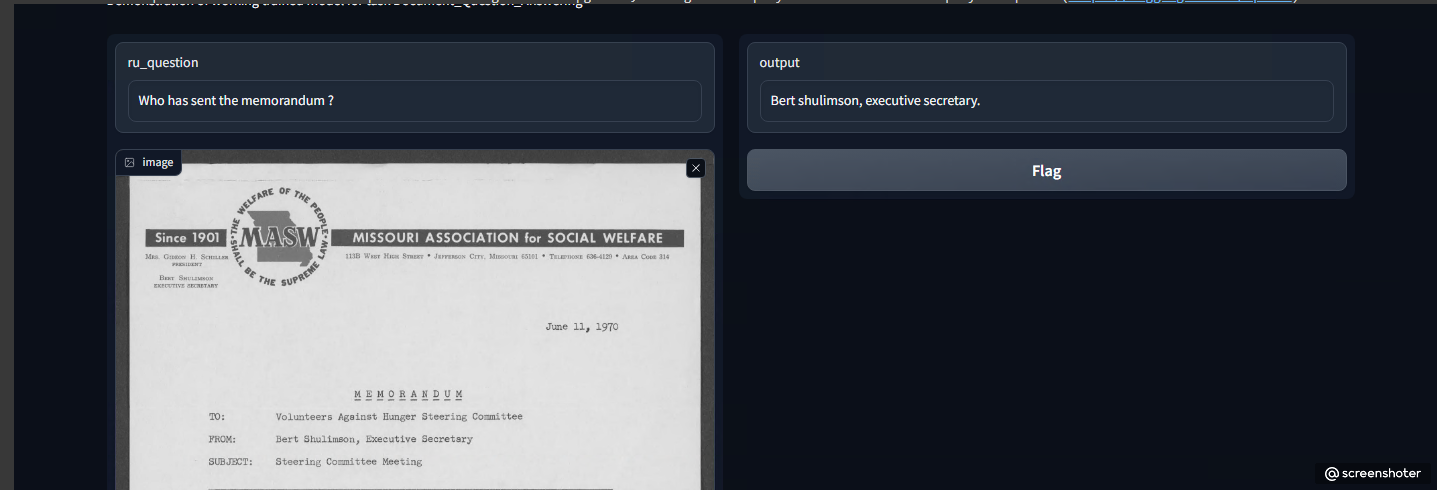